In [1]:
#Librerias para EDA y gráficos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [2]:
#Librerias para K-Means

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#Libreria para coeficientes

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Lectura de datos

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Descripcion de datos

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Detección de faltantes y valores atípicos')

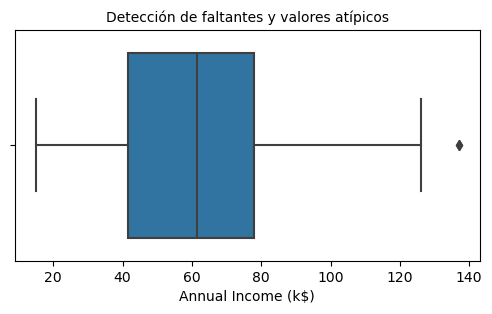

In [5]:
#Deteccion de faltantes y valores atípicos

plt.figure(figsize= (6,3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Detección de faltantes y valores atípicos', fontsize=10)

In [8]:
#Validacion de los datos

print("Cantidad de registros con cero en Género: ", df['Gender'].isin([0]).sum())
print("Cantidad de registros con cero en Edad: ", df['Age'].isin([0]).sum())
print("Cantidad de registros con cero en Ingresos Anuales: ",  df['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registros con cero en Puntaje: ",  df['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros con cero en Género:  0
Cantidad de registros con cero en Edad:  0
Cantidad de registros con cero en Ingresos Anuales:  0
Cantidad de registros con cero en Puntaje:  0


Text(0.5, 1.0, 'Detección de faltantes y valores atípicos')

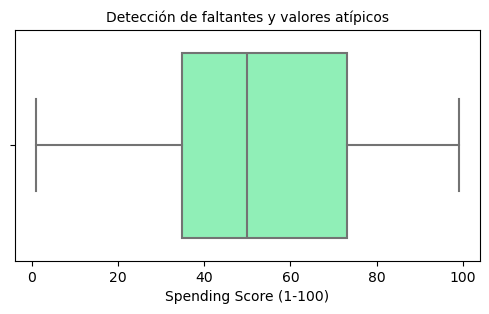

In [9]:
#Revision valores atipicos

plt.figure(figsize= (6,3))
sns.boxplot(x=df['Spending Score (1-100)'], palette='rainbow')
plt.title('Detección de faltantes y valores atípicos', fontsize=10)

In [14]:
#Validacion de los datos

Nivel_Min=0
Nivel_Max=100
Total_atipicos=((df['Spending Score (1-100)']<Nivel_Min)|(df['Spending Score (1-100)']>Nivel_Max)).sum()
print("Total de datos atipicos {}: ".format(Total_atipicos))

Total de datos atipicos 0: 


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
#Filtrar columnas del modelo
df=df[["Age","Spending Score (1-100)"]]

In [24]:
#revision de los valores objetivo

Df.head()


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


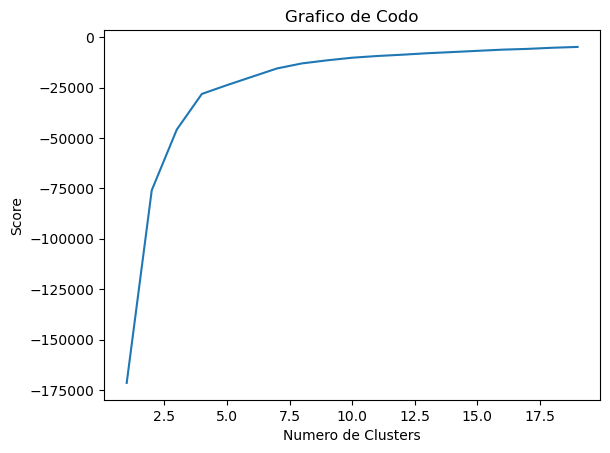

In [27]:
#Grafico de codo

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Grafico de Codo')
plt.show()

In [33]:
#Ejecutamos modelo K-Means

KMeans= KMeans(n_clusters=12, random_state=0)
KMeans.fit(df)

KMeans(n_clusters=12, random_state=0)

In [37]:
#etiquetar datos

KMeans.labels_
df["Etiquetas"]= KMeans.labels_
print(df)

     Age  Spending Score (1-100)  Etiquetas
0     19                      39          8
1     21                      81          9
2     20                       6          5
3     23                      77          9
4     31                      40          8
..   ...                     ...        ...
195   35                      79          1
196   45                      28          3
197   32                      74          1
198   32                      18          7
199   30                      83          9

[200 rows x 3 columns]


In [40]:
#Prepararar metricas

Observaciones=len(df)
X=df.drop('Etiquetas',  axis=1)
Clusters= df["Etiquetas"]

In [43]:
Sil= silhouette_score (X,Clusters)
Calinski= calinski_harabasz_score (X,Clusters)
Davies = davies_bouldin_score (X,Clusters)

In [47]:
#crear tabla

Table_data =[

["Numero de Observaciones: ", Observaciones],
["Coeficiente de silhouette:  ", Sil],
["Indice de calinski_harabasz: ", Calinski],
["Indice de davies_bouldin:  ", Davies]
]


In [52]:
#Imprimir tabla

from tabulate import tabulate
print (tabulate(Table_data, headers=["Metricas", "Valores"]))

Metricas                         Valores
----------------------------  ----------
Numero de Observaciones:      200
Coeficiente de silhouette:      0.379402
Indice de calinski_harabasz:  317.628
Indice de davies_bouldin:       0.844166


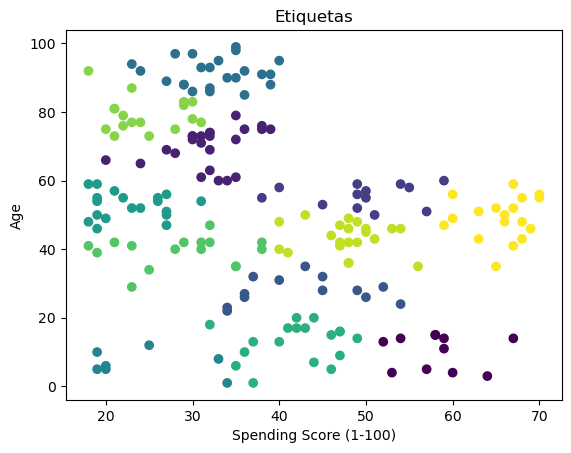

In [64]:
#Realizar graficas
plt.scatter(df['Age'],df['Spending Score (1-100)'], c=df['Etiquetas'], cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.title('Etiquetas')
plt.show()